In [1]:
from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *
from ThesisScripts.Visualizations import *
from ThesisScripts.PhyloTree import *

from IPython.display import Image

%matplotlib inline
#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

#  Simulations

## Low selection

In [30]:
%%time
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**8
q = 10**(-3)
qfac = 1
alpha = 0.3
sel = 0.004
highSel = Population(l, q, mutfactor=qfac, death_frac=alpha, selection=sel)
highSel.simulate()
print("Total population size:", highSel.size)
print("Generations:", highSel.gen)
print()
print("Start clone size:", highSel.start_clone.size)
print("Number of subclones:", len(highSel.clones[1:]))

Total population size: 116402657
Generations: 35

Start clone size: 113922568
Number of subclones: 166140
CPU times: user 8.45 s, sys: 176 ms, total: 8.63 s
Wall time: 8.59 s


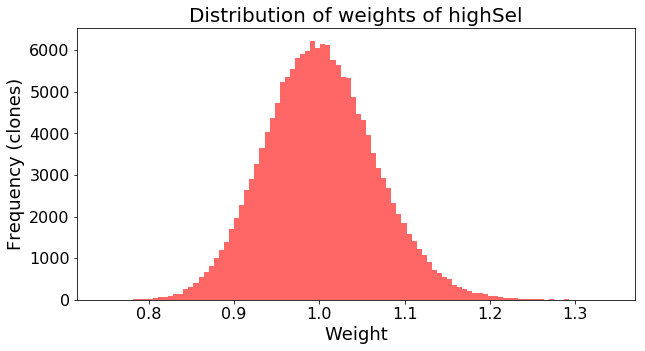

In [31]:
# Check weights of clones for population with selection
weights = []
for clone in highSel.clones:
    weights.append(clone.weight)

plt.figure(figsize=(10,5))
plt.hist(weights, bins=100, color='r', alpha=0.6)
plt.title("Distribution of weights of highSel")
plt.xlabel("Weight")
plt.ylabel("Frequency (clones)")
plt.show()

### *Final_data*

In [17]:
highSel_data = final_data(highSel)
highSel_data.head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color
Clone ID,,,,,,,,,
A,0,0.001,114624393,116402657,1.000000,0,163528,1.000000,"(0, 0, 0)"
A.0,7,0.001,0,0,0.000000,1,0,0.993224,"(174, 224, 111)"
A.1,14,0.001,358297,367385,0.003156,1,517,1.063564,"(156, 108, 63)"
A.2,16,0.001,13061,13143,0.000113,1,24,0.995456,"(46, 45, 185)"
A.3,16,0.001,24825,24900,0.000214,1,39,0.999849,"(219, 174, 182)"


**ALL ANALYSES** are carried out with the detection limit defined below, unless otherwise stated.

In [18]:
detection_limit = 100

## Evolution of clone family sizes for Large Population with High Selection

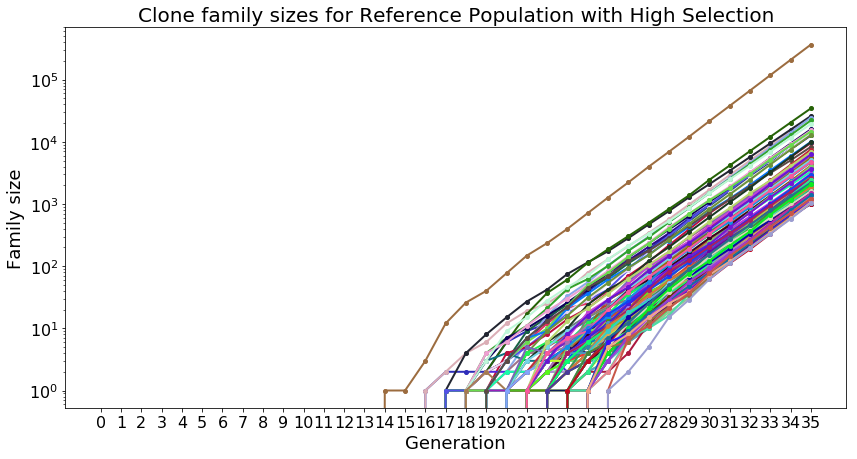

In [19]:
highSel_fam_size_plot = family_size_plots(highSel, det_lim=1000);
plt.title("Clone family sizes for Reference Population with High Selection");
#plt.legend();
plt.show()

## Evolution of Start clone size for High Selection

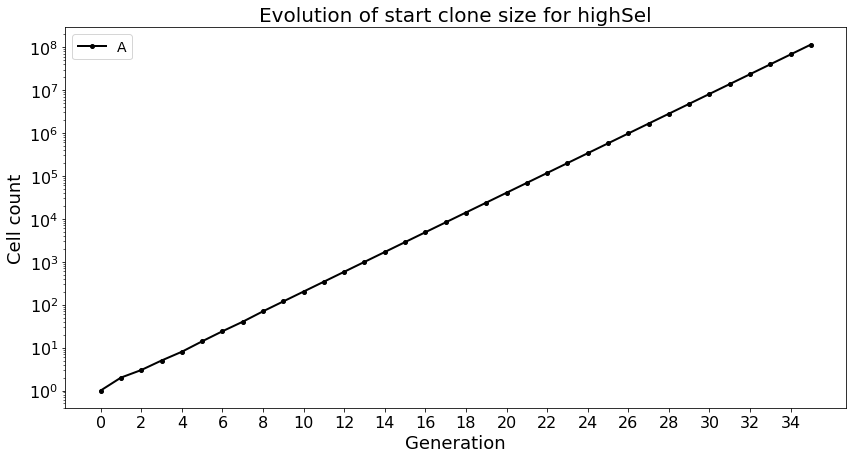

In [20]:
# evolution of start clone size for highSel
plt.figure()
plt.plot(highSel.start_clone.size_vec, marker='.', color='k', label=highSel.start_clone.ID);
plt.ylabel("Cell count");
plt.xlabel("Generation");
plt.title("Evolution of start clone size for highSel");
plt.legend();
plt.xticks(range(0, highSel.gen+1, 2));
plt.yscale('log');
plt.show()

## Phylo tree for Large Population with High Selection

In [27]:
highSel_tree, highSel_ts = build_tree(highSel, det_lim=1000, log=True)
print(highSel_tree)


   /- /-A.1.0
  |
  |--A.2
  |
  |--A.3
  |
  |--A.5
  |
  |--A.6
  |
  |--A.7
  |
  |--A.9
  |
  |--A.10
  |
  |--A.11
  |
  |--A.12
  |
  |--A.13
  |
  |--A.14
  |
  |--A.15
  |
  |--A.16
  |
  |--A.17
  |
  |--A.18
  |
  |--A.19
  |
  |--A.20
  |
  |--A.21
  |
  |--A.22
  |
  |--A.23
  |
  |--A.24
  |
  |--A.25
  |
  |--A.26
  |
  |--A.29
  |
  |--A.30
  |
  |--A.32
  |
  |--A.33
  |
  |--A.34
  |
  |--A.35
  |
  |--A.36
  |
  |--A.38
  |
  |--A.39
  |
  |--A.43
  |
  |--A.44
  |
  |--A.45
  |
  |--A.46
  |
  |--A.48
  |
  |--A.49
  |
  |--A.52
  |
  |--A.55
  |
  |--A.56
  |
  |--A.58
  |
  |--A.59
  |
  |--A.60
  |
  |--A.61
  |
  |--A.62
  |
  |--A.63
  |
  |--A.65
  |
  |--A.67
  |
  |--A.69
  |
  |--A.70
  |
  |--A.72
  |
  |--A.73
  |
  |--A.75
  |
  |--A.77
  |
  |--A.79
  |
  |--A.81
  |
  |--A.83
  |
  |--A.84
  |
  |--A.85
  |
  |--A.87
  |
  |--A.88
  |
  |--A.90
  |
--|--A.91
  |
  |--A.92
  |
  |--A.93
  |
  |--A.95
  |
  |--A.96
  |
  |--A.97
  |
  |--A.98
  |
  |--A.

## Allele frequency spectrum for Large Population with Selection

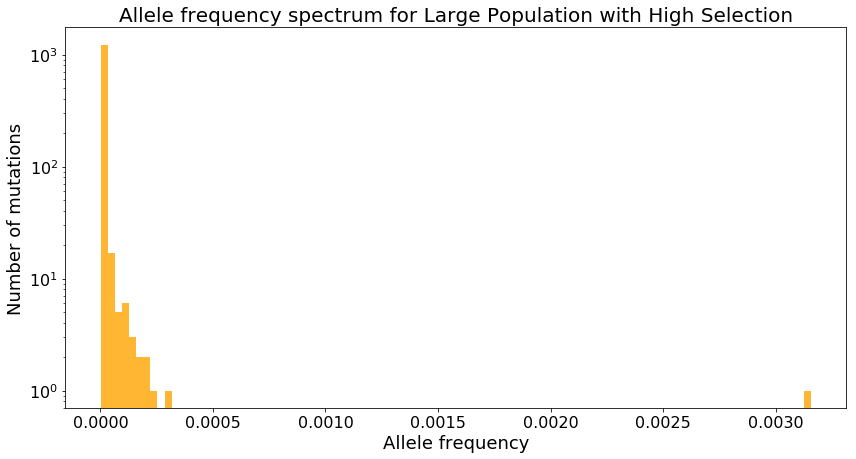

In [22]:
highSel_af = highSel_data.loc[highSel_data["Family size"] > detection_limit]["Allele frequency"]
highSel_af.iloc[1:].plot(kind='hist', grid=False, logy=True, bins=100, color='orange', alpha=0.8);
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for Large Population with High Selection');
plt.show()

## Cumulative number of mutations in function of 1/f 


R^2 = 0.999621770769


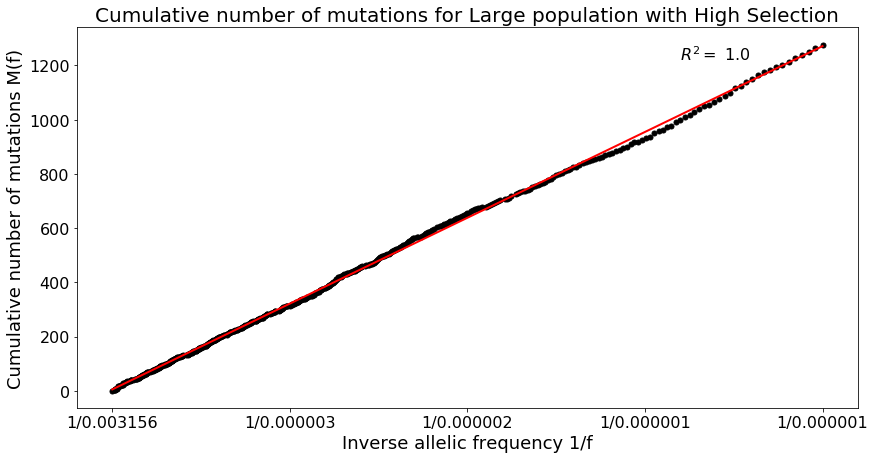

In [23]:
fit_highSel_af_r_value = fit_cumulative_mutations(highSel_data, det_lim=detection_limit, plot=True)
print("\nR^2 =", fit_highSel_af_r_value)
plt.title("Cumulative number of mutations for Large population with High Selection");
plt.show()

## Heterogeneity

In [24]:
highSel_h = heterogeneity(highSel_data, det_lim=1)
print(highSel_h)

0.957174146106


## Distribution of number of mutations per clone

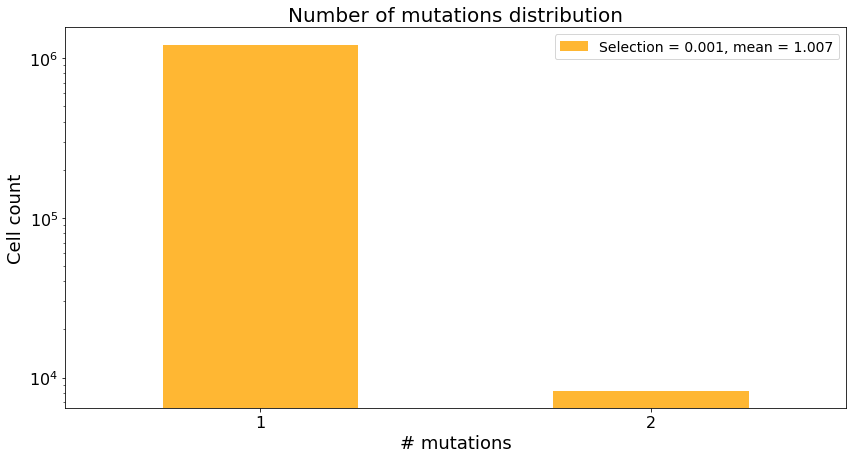

In [25]:
highSel_num_mut_df = num_mutations_distribution(highSel_data, det_lim=detection_limit)
highSel_avg_num_mut = avg_num_mutations(highSel_num_mut_df)
highSel_num_mut_df.columns = ["Selection = %s, mean = %s" %(sel, round(highSel_avg_num_mut, 3))]
highSel_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='orange', alpha=0.8);

plt.ylabel("Cell count");
plt.title("Number of mutations distribution");
plt.show()

## Reconstructing the mutational timeline for high Selection population

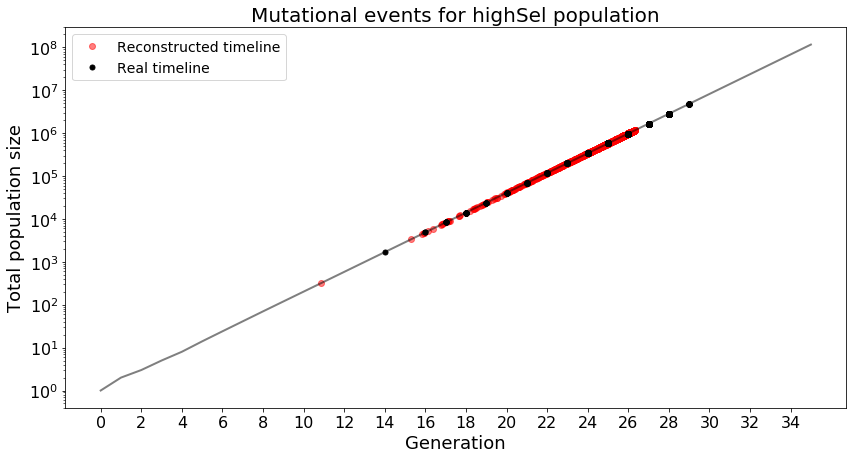

In [26]:
highSel_mutations = highSel_data.iloc[1:].loc[highSel_data['Family size'] >= 100]
highSel_real_t = highSel_mutations['Birthday'].values
highSel_real_popsizes = list(highSel.size_vec[i] for i in highSel_real_t)

highSel_rec_t, highSel_rec_popsizes, highSel_rec_errors = reconstruct_mutational_timeline(highSel_data, alpha=0.3, det_lim = 100)

plt.plot(highSel_rec_t, highSel_rec_popsizes, marker='o', markersize=6, color='r', alpha=0.5,
         linestyle='none', label='Reconstructed timeline');
plt.plot(highSel.size_vec, color='k', alpha=0.5);
plt.plot(highSel_real_t, highSel_real_popsizes, marker='o', markersize=5, color='k', 
         linestyle='none', label='Real timeline');
plt.xlabel('Generation');
plt.ylabel('Total population size');
plt.legend();
plt.title('Mutational events for highSel population');
plt.xticks(range(0, highSel.gen, 2));
#plt.xlim(-0.5, 31.5);
#plt.ylim(-0.1*10**7, 3*10**7);
plt.yscale('log');
plt.show()